In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import warnings
warnings.filterwarnings('ignore')

# Data Cleaning & Pre-processing

In [2]:
df=pd.read_csv('dataset.csv')

In [3]:
df.head()

,Date,Type,Gender,weather,Path
0,2019-09-20 11:42:54,formal,male,summer,dataset\formal_men_summer\Mens Summer Perfect ...
1,2020-02-19 21:35:43,beach,male,Summer,dataset\beach_men\What To Wear In Greece_ 20 O...
2,2005-12-30 12:33:02,casual,male,summer,dataset\casual_men_summer\dce0cc20-48bc-4c22-b...
3,2002-02-07 03:51:00,formal,male,winter,dataset\formal_men_winter\WhatsApp Image 2024-...
4,2008-03-20 13:20:57,casual,female,winter,dataset\casual_women_winter\Screenshot_2024010...


In [4]:
df.dtypes

Date       object
Type       object
Gender     object
weather    object
Path       object
dtype: object

In [5]:
df.isna().sum()

Date       0
Type       0
Gender     0
weather    0
Path       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1346 entries, 0 to 1345
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     1346 non-null   object
 1   Type     1346 non-null   object
 2   Gender   1346 non-null   object
 3   weather  1346 non-null   object
 4   Path     1346 non-null   object
dtypes: object(5)
memory usage: 52.7+ KB


### Col : Weather

In [7]:
df.weather.value_counts()

weather
summer    756
winter    501
Summer     57
Winter     32
Name: count, dtype: int64

There is error in weather type of data

In [8]:
def correct_weather(x):
    if x=='winter':
        return 'Winter'
    elif x=='summer':
        return 'Summer'
    else:
        return x
    

In [9]:
df['weather']=df.weather.apply(correct_weather)

In [10]:
df.weather.value_counts()

weather
Summer    813
Winter    533
Name: count, dtype: int64

### Col: Date
- Convert `String` date to `datetime` data type.
- Form new columns of `year` and `months` 

In [11]:
df['Date']=pd.to_datetime(df.Date)

In [12]:
df.dtypes

Date       datetime64[ns]
Type               object
Gender             object
weather            object
Path               object
dtype: object

In [13]:
df['year']=df.Date.dt.year
df['month']=df.Date.dt.month
df['time']=df.Date.dt.time
df['hour']=df.Date.dt.hour

In [14]:
df.dtypes

Date       datetime64[ns]
Type               object
Gender             object
weather            object
Path               object
year                int32
month               int32
time               object
hour                int32
dtype: object

### Col : Path
- Some of images are not readable

In [15]:
def check_img(path):
    try:
        img=path
        img_array=cv2.imread(img)
        plt.imshow(img_array)
        return True
    except Exception as e:
        return False
    

CPU times: total: 16.8 s
Wall time: 45.8 s


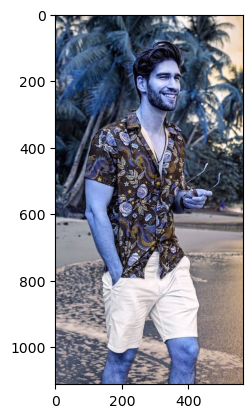

In [16]:
%%time
df['valid_images']=df.Path.apply(check_img)

In [17]:
df.valid_images.value_counts()

valid_images
True     1252
False      94
Name: count, dtype: int64

In [18]:
df1=df[df.valid_images].copy()

In [19]:
df1.shape


(1252, 10)

In [20]:
df1.columns

Index(['Date', 'Type', 'Gender', 'weather', 'Path', 'year', 'month', 'time',
       'hour', 'valid_images'],
      dtype='object')

#  Exploratory Data Analysis

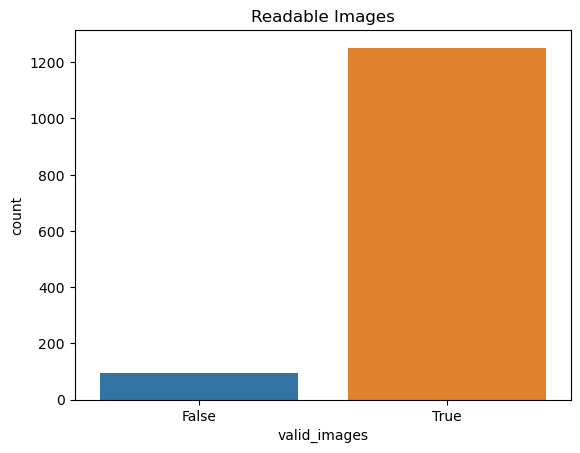

In [21]:
sns.countplot(data=df,x='valid_images')
plt.title('Readable Images')
plt.show()

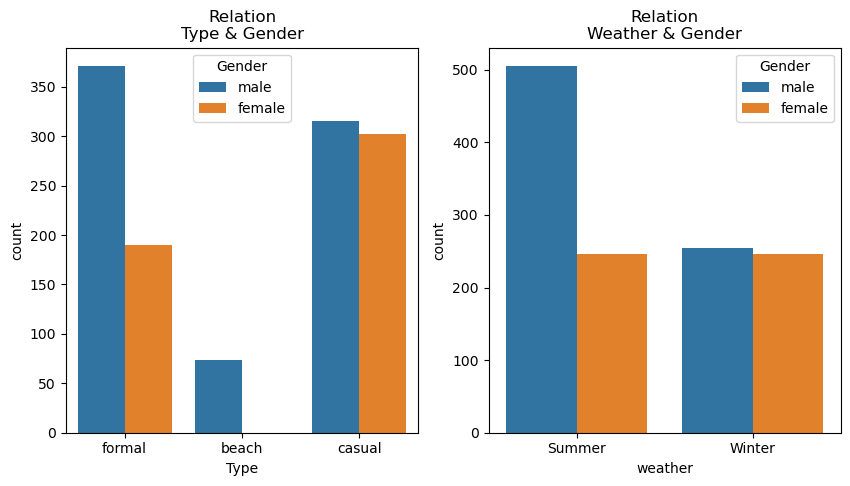

In [22]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data=df1,x='Type',hue='Gender')
plt.title("Relation\nType & Gender")

plt.subplot(1,2,2)
sns.countplot(data=df1,x='weather',hue='Gender')
plt.title("Relation\nWeather & Gender")



plt.show()

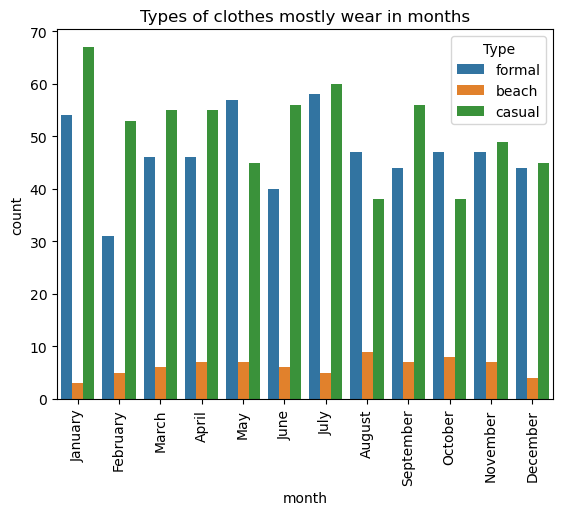

In [23]:
sns.countplot(data=df1,x='month',hue='Type');
plt.title("Types of clothes mostly wear in months")
months=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

plt.xticks([i for i in range(12)],months,rotation=90)
plt.show()

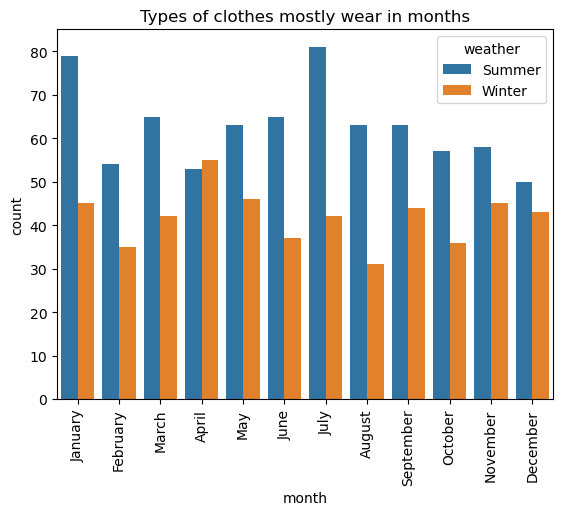

In [24]:
sns.countplot(data=df1,x='month',hue='weather');
plt.title("Types of clothes mostly wear in months")
months=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

plt.xticks([i for i in range(12)],months,rotation=90)
plt.show()

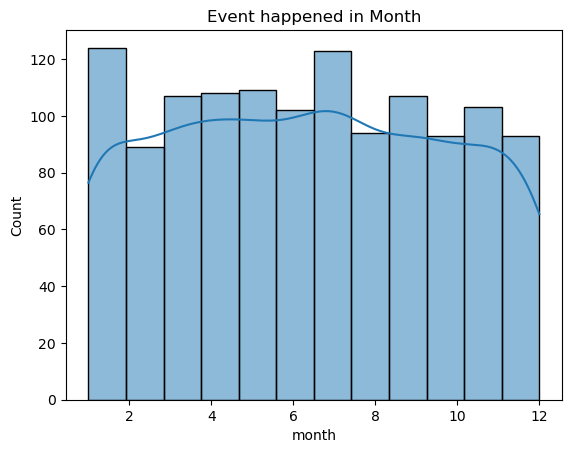

In [25]:
sns.histplot(data=df1,x='month',kde=True);
plt.title('Event happened in Month')
plt.show()

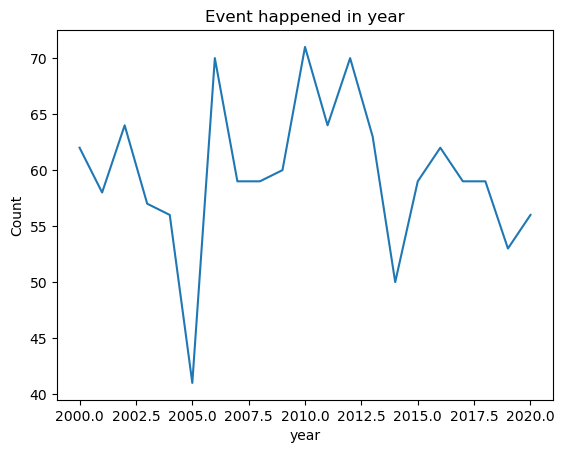

In [26]:
df1.year.value_counts().sort_index().plot()
plt.ylabel("Count")
plt.title('Event happened in year')
plt.show()

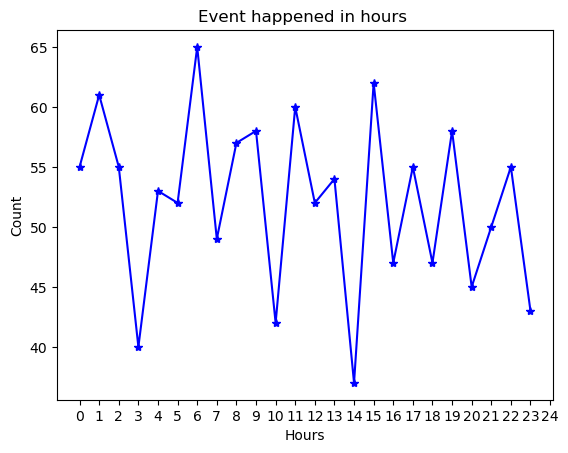

In [27]:
hour_gr=df1.groupby('hour')
hr=hour_gr.Path.count().index
hr_val=hour_gr.Path.count().values
plt.plot(hr,hr_val,'b-*')
plt.xticks(list(range(24+1)))
plt.title('Event happened in hours ')
plt.xlabel('Hours')
plt.ylabel('Count')
plt.show()

# Feature Engineering

In [28]:
df1['minute']=df1.Date.dt.minute

In [29]:
df1.head(2)

,Date,Type,Gender,weather,Path,year,month,time,hour,valid_images,minute
0,2019-09-20 11:42:54,formal,male,Summer,dataset\formal_men_summer\Mens Summer Perfect ...,2019,9,11:42:54,11,True,42
1,2020-02-19 21:35:43,beach,male,Summer,dataset\beach_men\What To Wear In Greece_ 20 O...,2020,2,21:35:43,21,True,35


In [30]:
df2=df1[['Type','Gender','weather','hour','minute','Path']].copy()

In [31]:
df2.head()

,Type,Gender,weather,hour,minute,Path
0,formal,male,Summer,11,42,dataset\formal_men_summer\Mens Summer Perfect ...
1,beach,male,Summer,21,35,dataset\beach_men\What To Wear In Greece_ 20 O...
2,casual,male,Summer,12,33,dataset\casual_men_summer\dce0cc20-48bc-4c22-b...
3,formal,male,Winter,3,51,dataset\formal_men_winter\WhatsApp Image 2024-...
4,casual,female,Winter,13,20,dataset\casual_women_winter\Screenshot_2024010...


### Encoding

- Type

In [32]:
df2.Type.unique()

array(['formal', 'beach', 'casual'], dtype=object)

In [33]:
df2['Type']=df2['Type'].map({'formal':1,'beach':0,'casual':2})

In [34]:
df2.head(2)

,Type,Gender,weather,hour,minute,Path
0,1,male,Summer,11,42,dataset\formal_men_summer\Mens Summer Perfect ...
1,0,male,Summer,21,35,dataset\beach_men\What To Wear In Greece_ 20 O...


- Gender

In [35]:
df2.Gender.unique()

array(['male', 'female'], dtype=object)

In [36]:
df2['Gender']=df2['Gender'].map({'male':1,'female':0})

In [37]:
df2.head(2)

,Type,Gender,weather,hour,minute,Path
0,1,1,Summer,11,42,dataset\formal_men_summer\Mens Summer Perfect ...
1,0,1,Summer,21,35,dataset\beach_men\What To Wear In Greece_ 20 O...


- Weather

In [38]:
df2.weather.unique()

array(['Summer', 'Winter'], dtype=object)

In [39]:
df2['weather']=df2['weather'].map({'Summer':1,'Winter':0})

In [40]:
df2.head()

,Type,Gender,weather,hour,minute,Path
0,1,1,1,11,42,dataset\formal_men_summer\Mens Summer Perfect ...
1,0,1,1,21,35,dataset\beach_men\What To Wear In Greece_ 20 O...
2,2,1,1,12,33,dataset\casual_men_summer\dce0cc20-48bc-4c22-b...
3,1,1,0,3,51,dataset\formal_men_winter\WhatsApp Image 2024-...
4,2,0,0,13,20,dataset\casual_women_winter\Screenshot_2024010...


In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
encoder=LabelEncoder()

In [43]:
encoder.fit(df2.Path)

LabelEncoder()

In [44]:
df2['label']=encoder.transform(df2.Path)

In [45]:
df2.head()

,Type,Gender,weather,hour,minute,Path,label
0,1,1,1,11,42,dataset\formal_men_summer\Mens Summer Perfect ...,831
1,0,1,1,21,35,dataset\beach_men\What To Wear In Greece_ 20 O...,58
2,2,1,1,12,33,dataset\casual_men_summer\dce0cc20-48bc-4c22-b...,222
3,1,1,0,3,51,dataset\formal_men_winter\WhatsApp Image 2024-...,1035
4,2,0,0,13,20,dataset\casual_women_winter\Screenshot_2024010...,631


In [46]:
df2.label.nunique()

1252

In [47]:
label_df=df2[['label','Path']]

In [48]:
label_df.head(2)

,label,Path
0,831,dataset\formal_men_summer\Mens Summer Perfect ...
1,58,dataset\beach_men\What To Wear In Greece_ 20 O...


In [49]:
label_df.set_index('label',inplace=True)

# Model Building

In [50]:
df2.head(2)

,Type,Gender,weather,hour,minute,Path,label
0,1,1,1,11,42,dataset\formal_men_summer\Mens Summer Perfect ...,831
1,0,1,1,21,35,dataset\beach_men\What To Wear In Greece_ 20 O...,58


In [51]:
X=df2.drop(['Path','label'],axis=1)
y=df2.label

In [52]:
X.head(2)

,Type,Gender,weather,hour,minute
0,1,1,1,11,42
1,0,1,1,21,35


In [53]:
y.head(2)

0    831
1     58
Name: label, dtype: int32

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [55]:
X_train.shape

(1001, 5)

In [56]:
y_train.shape

(1001,)

In [57]:
import tensorflow as tf
from tensorflow import keras

In [58]:
model=keras.Sequential([
    keras.layers.Dense(1000,input_shape=(5,),activation='relu'),
    keras.layers.Dense(780,activation='relu'),
    keras.layers.Dense(880,activation='relu'),
    keras.layers.Dense(1080,activation='relu'),
    keras.layers.Dense(1220,activation='relu'),
    keras.layers.Dense(1252,activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train,y_train,epochs=204)



Epoch 1/204


32/32 [==============================] - 5s 78ms/step - loss: 7.2162 - accuracy: 0.0000e+00
Epoch 2/204
32/32 [==============================] - 2s 78ms/step - loss: 7.1214 - accuracy: 0.0000e+00
Epoch 3/204
32/32 [==============================] - 3s 86ms/step - loss: 6.9952 - accuracy: 0.0000e+00
Epoch 4/204
32/32 [==============================] - 2s 71ms/step - loss: 6.6865 - accuracy: 0.0000e+00
Epoch 5/204
32/32 [==============================] - 3s 86ms/step - loss: 6.4032 - accuracy: 9.9900e-04
Epoch 6/204
32/32 [==============================] - 3s 88ms/step - loss: 6.1707 - accuracy: 9.9900e-04
Epoch 7/204
32/32 [==============================] - 4s 114ms/step - loss: 5.9575 - accuracy: 9.9900e-04
Epoch 8/204
32/32 [==============================] - 2s 71ms/step - loss: 5.7329 - accuracy: 9.9900e-04
Epoch 9/204
32/32 [==============================] - 3s 103ms/step - loss: 5.5358 - accuracy: 9.9900e-04
Epoch 10/204
32/32 [==============================] - 2s 7

32/32 [==============================] - 2s 71ms/step - loss: 1.7824 - accuracy: 0.2907
Epoch 74/204
32/32 [==============================] - 3s 85ms/step - loss: 1.6941 - accuracy: 0.3357
Epoch 75/204
32/32 [==============================] - 2s 79ms/step - loss: 1.8323 - accuracy: 0.3107
Epoch 76/204
32/32 [==============================] - 2s 61ms/step - loss: 1.7540 - accuracy: 0.3187
Epoch 77/204
32/32 [==============================] - 3s 97ms/step - loss: 1.6089 - accuracy: 0.3596
Epoch 78/204
32/32 [==============================] - 2s 78ms/step - loss: 1.8378 - accuracy: 0.3227
Epoch 79/204
32/32 [==============================] - 3s 95ms/step - loss: 1.8567 - accuracy: 0.2797
Epoch 80/204
32/32 [==============================] - 2s 76ms/step - loss: 1.7197 - accuracy: 0.2917
Epoch 81/204
32/32 [==============================] - 2s 75ms/step - loss: 1.5278 - accuracy: 0.3896
Epoch 82/204
32/32 [==============================] - 3s 93ms/step - loss: 1.5462 - accuracy: 0.4016
Epo

32/32 [==============================] - 2s 73ms/step - loss: 1.0109 - accuracy: 0.5804
Epoch 154/204
32/32 [==============================] - 2s 73ms/step - loss: 1.2741 - accuracy: 0.4565
Epoch 155/204
32/32 [==============================] - 2s 71ms/step - loss: 1.2013 - accuracy: 0.5215
Epoch 156/204
32/32 [==============================] - 2s 69ms/step - loss: 1.0058 - accuracy: 0.5704
Epoch 157/204
32/32 [==============================] - 2s 71ms/step - loss: 1.3085 - accuracy: 0.4825
Epoch 158/204
32/32 [==============================] - 2s 71ms/step - loss: 1.3109 - accuracy: 0.4605
Epoch 159/204
32/32 [==============================] - 2s 72ms/step - loss: 1.1246 - accuracy: 0.5215
Epoch 160/204
32/32 [==============================] - 2s 73ms/step - loss: 1.0020 - accuracy: 0.5894
Epoch 161/204
32/32 [==============================] - 2s 71ms/step - loss: 0.9702 - accuracy: 0.5994
Epoch 162/204
32/32 [==============================] - 2s 72ms/step - loss: 0.9527 - accuracy: 0

In [59]:
pred=model.predict(X_test)
pred

8/8 [==============================] - 0s 10ms/step


array([[2.0259314e-27, 2.9409323e-32, 3.9437390e-34, ..., 1.4461287e-35,
        3.9074949e-29, 1.2504209e-30],
       [5.5235708e-11, 4.1168617e-25, 0.0000000e+00, ..., 1.4094368e-13,
        3.6511107e-17, 1.2691332e-16],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.4870675e-35, 0.0000000e+00],
       ...,
       [8.0075659e-38, 0.0000000e+00, 1.9101484e-33, ..., 3.1850537e-32,
        8.0691022e-32, 3.2919230e-36],
       [7.2976591e-28, 8.9055849e-25, 1.4988855e-27, ..., 3.7212795e-38,
        1.7508185e-26, 7.6720506e-27],
       [6.2272650e-38, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 5.3430738e-36]], dtype=float32)

In [60]:
import numpy as np
np.argmax(pred[5])

906

In [61]:
model.evaluate(X_train,y_train)

32/32 [==============================] - 1s 10ms/step - loss: 0.7796 - accuracy: 0.6853


[0.7795853018760681, 0.6853147149085999]

In [62]:
model.evaluate(X_test,y_test)

8/8 [==============================] - 0s 10ms/step - loss: 31.1601 - accuracy: 0.0000e+00


[31.160118103027344, 0.0]

In [63]:
X_train.head(2)

,Type,Gender,weather,hour,minute
1251,2,1,0,14,40
639,1,1,0,13,37


### Encoded Values
- Type : Formal =1, beach=0, casual=2
- Gender : Male =1 , Female =0
- Weather : Summer =1 , Winter =0
- Hour : 12
- Minute : 60

In [64]:
predict_val=np.argmax(model.predict([[2,1,0,2,50]]))
predict_val

1/1 [==============================] - 0s 202ms/step


554

In [65]:
img=label_df.loc[predict_val]
img

Path    dataset\casual_women_winter\25 Sexy and Comfor...
Name: 554, dtype: object

In [66]:
img[0]

'dataset\\casual_women_winter\\25 Sexy and Comfortable casual winter outfits, 50_ off.jpeg'

In [67]:
from tensorflow.keras.preprocessing import image

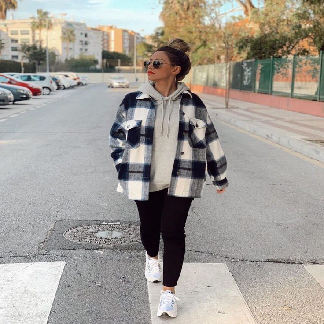

In [68]:
image.load_img(img[0],target_size=(324,324))
